<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ordinary Differential Equations

In [213]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math

My function from project 1,
$$
f(x) = e^x
$$
Using that function my differential equation function will be,
$$
\frac{dy}{dx} = e^x\left(1-y\right)\quad\quad y(0) = 2
$$
After solving the above function, we get the function,
$$
y(x) = 1+ e^{-e^x+1}
$$


Now, Let's plot the solution on the graph.

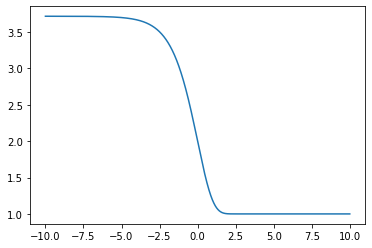

In [214]:
y = lambda x: 1+math.e**((-math.e**x)+1)
x = np.linspace(-10, 10, 1000)

plt.plot(x,y(x))

## Euler's Method

For our first method, we will approximate the solution by computing the next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

First let's define our differential equation function from above.

In [215]:
f = lambda x,y: (math.e**x)*(1-y)

Now, Let's create an euler method function

In [216]:
def eulerMethod(function,init,interval):
  eu_solution = []
  y=init
  h = interval[1]-interval[0]
  for i in interval:
    eu_solution.append([y])
    y = y + f(i,y)*h
  return np.array(eu_solution)

Now, using euler method function, let's graph the analytic solution and numerical solution

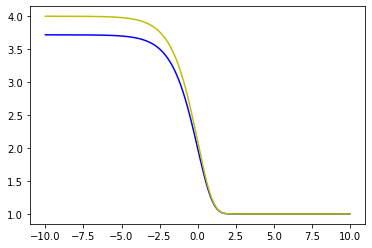

In [217]:
plt.plot(x, y(x), 'b')
plt.plot(x, eulerMethod(f,4,x), 'y')

##Runge-Kutta 4th Order

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [218]:
def rungeKutta(function, init, interval):
  ru_solution = []
  y = init
  h = interval[1]-interval[0]
  for i in interval:
    ru_solution.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(ru_solution)

Now, Let's graph all three different solutions on the same interval.

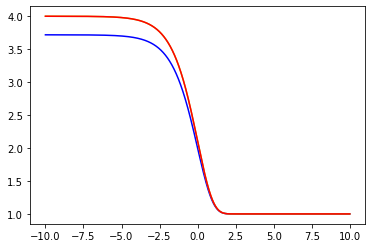

In [219]:
plt.plot(x, y(x),'b')
plt.plot(x, eulerMethod(f,4,x),'y')
plt.plot(x,rungeKutta(f,4,x),'r')

In [220]:
#function to compute error
def error(actual_value, estimate_value):

  error = (actual_value - estimate_value)/estimate_value
  return abs(error)*100

In [212]:
points = np.linspace(-10, 10, 20)
actual_value = [1+math.e**((-math.e**x)+1) for x in range(-10,10)]
euler_value = eulerMethod(f,4,points)
runge_value = rungeKutta(f,4,points)
print(actual_value)

[3.718158421456314, 3.7179463865299796, 3.717370099427549, 3.715804206103635, 3.711552225414732, 3.70002775611737, 3.668947930156542, 3.5862602973158775, 3.3742099197276874, 2.881596387531645, 2.0, 1.1793740787340172, 1.0016798410570682, 1.000000005143475, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
